## Mini Project
### DATA 400 - Professor Bilen
### Phuong Anh Phi



In [ ]:

import pandas as pd

# File paths

files = {
    "birth": "/Users/phuonganh/Downloads/data/Crude birth rate.xlsx",
    "income": "/Users/phuonganh/Downloads/data/Monthly average income per employee.xlsx",
    "kindergarten": '/Users/phuonganh/Downloads/data/number of pupils in kindergarten.xlsx',
    "university": "/Users/phuonganh/Downloads/data/Number of student in universities.xlsx"
}

# Reshape function

def reshape_file(path, value_name):
    
    # Load first row as header
    df = pd.read_excel(path, header=0)

    # Rename first column
    df = df.rename(columns={df.columns[0]: "Province"})

    # Melt wide into long
    df = df.melt(id_vars=["Province"], var_name="Year", value_name=value_name)

    # Extract valid year numbers
    df["Year"] = df["Year"].astype(str).str.extract(r"(\d{4})")
    df = df.dropna(subset=["Year"])
    df["Year"] = df["Year"].astype(int)

    # Clean province names
    df["Province"] = df["Province"].str.strip()

    return df

# Load dataset

birth = reshape_file(files["birth"], "BirthRate")
income = reshape_file(files["income"], "Income")
kinder = reshape_file(files["kindergarten"], "Kindergarten")
university = reshape_file(files["university"], "UniversityStudents")

# Merge datasets

merged = birth.merge(income, on=["Province", "Year"], how="outer")
merged = merged.merge(kinder, on=["Province", "Year"], how="outer")
merged = merged.merge(university, on=["Province", "Year"], how="outer")

merged


,Province,Year,BirthRate,Income,Kindergarten,UniversityStudents
0,Ha Noi,2005,16.3,NaN,NaN,NaN
1,Vinh Phuc,2005,18.7,NaN,NaN,NaN
2,Bac Ninh,2005,19.5,NaN,NaN,NaN
3,Quang Ninh,2005,17.6,NaN,NaN,NaN
4,Hai Duong,2005,17.1,NaN,NaN,NaN
...,...,...,...,...,...,...
1230,Thai Nguyen,2023,NaN,NaN,65.42,NaN
1231,Thua Thien-Hue,2023,NaN,NaN,51.27,62274
1232,Binh Duong,2023,NaN,NaN,96.20,NaN
1233,Thua Thien-Hue,2019,NaN,NaN,NaN,45380


In [ ]:
# Replace NA values with mean 
merged[["BirthRate","Income","Kindergarten","UniversityStudents"]] = (
    merged.groupby("Province")[["BirthRate","Income","Kindergarten","UniversityStudents"]]
      .transform(lambda x: x.fillna(x.mean()))
)

# Select values from 2015 to 2024
new_merged = merged[(merged["Year"] >= 2015) & (merged["Year"] < 2025)]
new_merged


/var/folders/j8/jsz2bgxj5nn8xzd_twjw_qmm0000gn/T/ipykernel_83230/2320425261.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  .transform(lambda x: x.fillna(x.mean()))
/var/folders/j8/jsz2bgxj5nn8xzd_twjw_qmm0000gn/T/ipykernel_83230/2320425261.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  .transform(lambda x: x.fillna(x.mean()))
/var/folders/j8/jsz2bgxj5nn8xzd_twjw_qmm0000gn/T/ipykernel_83230/2320425261.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will defau

,Province,Year,BirthRate,Income,Kindergarten,UniversityStudents
567,Ha Noi,2015,16.3,8337.07,391.05,611608.0
568,Vinh Phuc,2015,17.7,6992.90,64.73,15675.0
569,Bac Ninh,2015,22.1,7647.47,66.51,6196.0
570,Quang Ninh,2015,15.4,6587.05,60.53,4588.0
571,Hai Duong,2015,14.5,6506.44,97.67,11533.0
...,...,...,...,...,...,...
1230,Thai Nguyen,2023,NaN,NaN,65.42,NaN
1231,Thua Thien-Hue,2023,NaN,NaN,51.27,62274.0
1232,Binh Duong,2023,NaN,NaN,96.20,NaN
1233,Thua Thien-Hue,2019,NaN,NaN,44.07,45380.0


In [22]:
merged_1 = new_merged.dropna()
merged_1


,Province,Year,BirthRate,Income,Kindergarten,UniversityStudents
567,Ha Noi,2015,16.30,8337.07,391.05,611608.0
568,Vinh Phuc,2015,17.70,6992.90,64.73,15675.0
569,Bac Ninh,2015,22.10,7647.47,66.51,6196.0
570,Quang Ninh,2015,15.40,6587.05,60.53,4588.0
571,Hai Duong,2015,14.50,6506.44,97.67,11533.0
...,...,...,...,...,...,...
1190,An Giang,2024,10.40,6897.92,54.58,9893.777778
1191,Kien Giang,2024,11.32,7985.36,40.20,3725.333333
1192,Can Tho,2024,10.78,7519.13,39.72,82813.888889
1193,Hau Giang,2024,10.84,5564.02,25.52,4201.555556


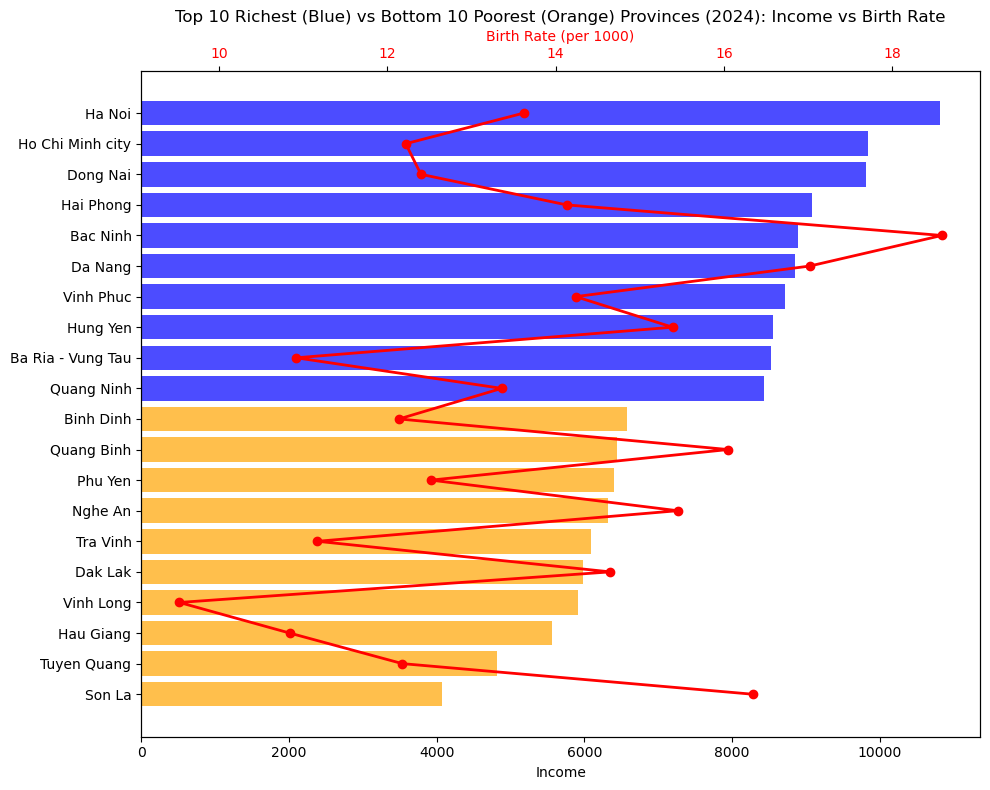

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Keep only latest year (2024)
df_latest = merged_1[merged_1["Year"] == 2024].copy()

# Top 10 richest
top10 = df_latest.nlargest(10, "Income").sort_values("Income", ascending=True)  # ascending for barh
# 10 poorest
bottom10 = df_latest.nsmallest(10, "Income").sort_values("Income", ascending=True)

# Combine both groups
combined = pd.concat([top10, bottom10])
combined = combined.sort_values("Income", ascending=True)  # sort for nice horizontal bars

# Colors: blue for richest, orange for poorest
colors = ["blue" if prov in top10["Province"].values else "orange" for prov in combined["Province"]]

# Plot

fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar chart for Income (horizontal)
ax1.barh(combined["Province"], combined["Income"], color=colors, alpha=0.7)
ax1.set_xlabel("Income", color="black")
ax1.tick_params(axis="x", labelcolor="black")

# Line chart for BirthRate (secondary axis)
ax2 = ax1.twiny()
ax2.plot(combined["BirthRate"], combined["Province"], color="red", marker="o", linewidth=2, label="Birth Rate")
ax2.set_xlabel("Birth Rate (per 1000)", color="red")
ax2.tick_params(axis="x", labelcolor="red")

# Title
plt.title("Top 10 Richest (Blue) vs Bottom 10 Poorest (Orange) Provinces (2024): Income vs Birth Rate", fontsize=12)

plt.tight_layout()
plt.show()


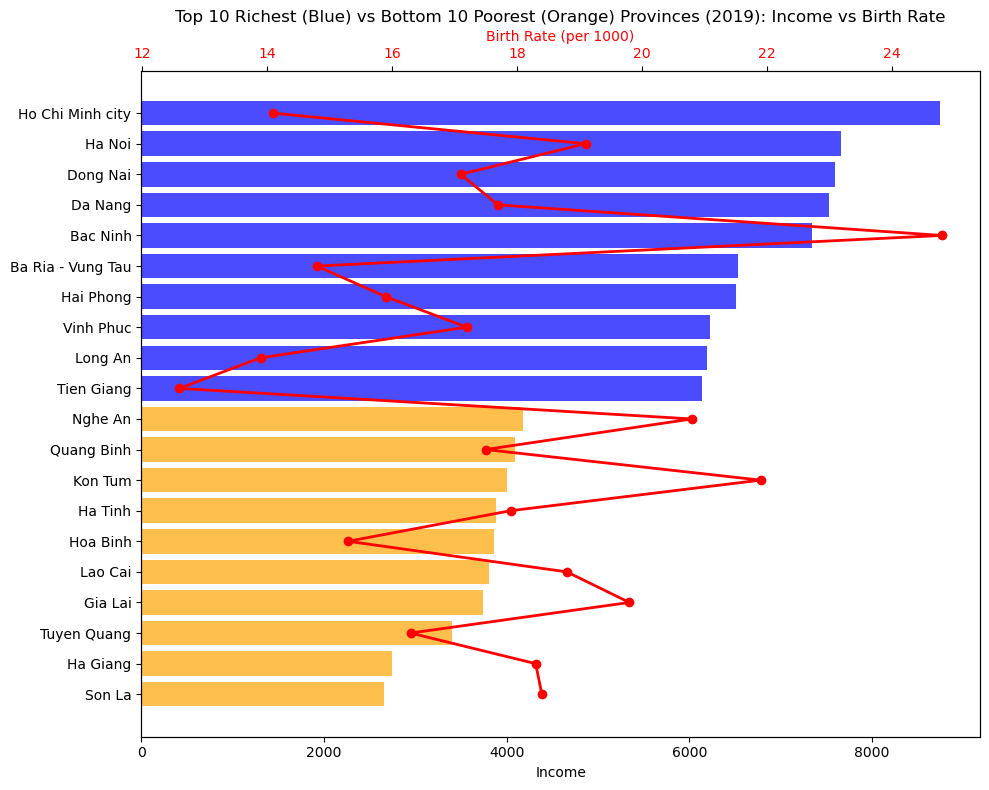

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Keep only latest year (2024)
df_latest = merged_1[merged_1["Year"] == 2019].copy()

# Top 10 richest
top10 = df_latest.nlargest(10, "Income").sort_values("Income", ascending=True)  # ascending for barh
# Bottom 10 poorest
bottom10 = df_latest.nsmallest(10, "Income").sort_values("Income", ascending=True)

# Combine both groups
combined = pd.concat([top10, bottom10])
combined = combined.sort_values("Income", ascending=True)  # sort for nice horizontal bars

# Colors: blue for richest, orange for poorest
colors = ["blue" if prov in top10["Province"].values else "orange" for prov in combined["Province"]]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar chart for Income (horizontal)
ax1.barh(combined["Province"], combined["Income"], color=colors, alpha=0.7)
ax1.set_xlabel("Income", color="black")
ax1.tick_params(axis="x", labelcolor="black")

# Line chart for BirthRate (secondary axis)
ax2 = ax1.twiny()
ax2.plot(combined["BirthRate"], combined["Province"], color="red", marker="o", linewidth=2, label="Birth Rate")
ax2.set_xlabel("Birth Rate (per 1000)", color="red")
ax2.tick_params(axis="x", labelcolor="red")

plt.title("Top 10 Richest (Blue) vs Bottom 10 Poorest (Orange) Provinces (2019): Income vs Birth Rate", fontsize=12)

plt.tight_layout()
plt.show()


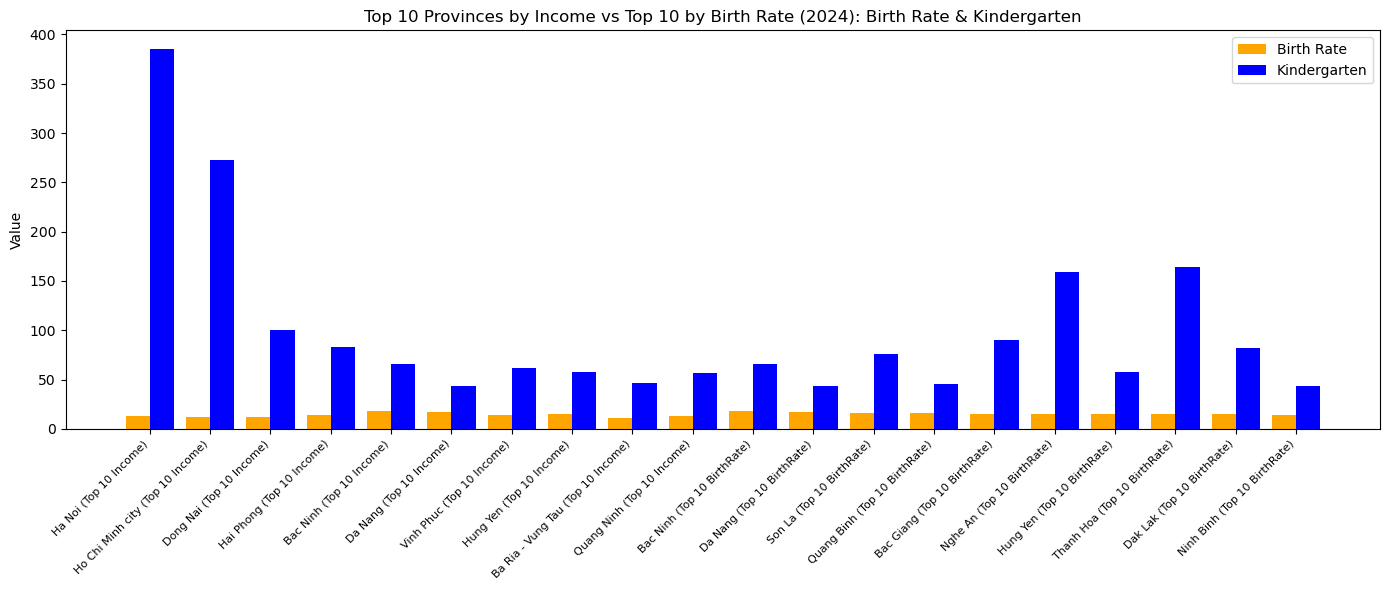

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Keep only the latest year (e.g., 2024)
df_latest = merged_1[merged_1["Year"] == 2024].copy()

# Top 10 provinces by Income
top10_income = df_latest.nlargest(10, "Income").sort_values("Income", ascending=False)
top10_income["Group"] = "Top 10 Income"

# Top 10 provinces by BirthRate
top10_birth = df_latest.nlargest(10, "BirthRate").sort_values("BirthRate", ascending=False)
top10_birth["Group"] = "Top 10 BirthRate"

# Combine into one dataframe
combined = pd.concat([top10_income, top10_birth])

# Plot
fig, ax = plt.subplots(figsize=(14,6))

bar_width = 0.4
x = range(len(combined))

# BirthRate bars
ax.bar([p - bar_width/2 for p in x], combined["BirthRate"], 
       bar_width, color="orange", label="Birth Rate")

# Kindergarten bars
ax.bar([p + bar_width/2 for p in x], combined["Kindergarten"], 
       bar_width, color="blue", label="Kindergarten")

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(combined["Province"] + " (" + combined["Group"] + ")", rotation=45, ha="right", fontsize=8)

# Titles
ax.set_title("Top 10 Provinces by Income vs Top 10 by Birth Rate (2024): Birth Rate & Kindergarten")
ax.set_ylabel("Value")
ax.legend()

plt.tight_layout()
plt.show()


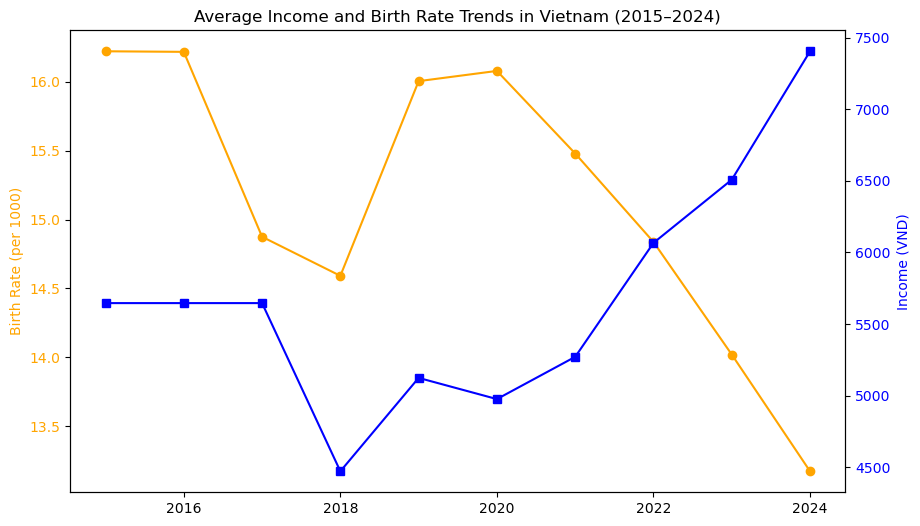

In [26]:
import matplotlib.pyplot as plt

# Group by Year → average values
df_yearly = merged_1.groupby("Year")[["Income", "BirthRate"]].mean().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot BirthRate (left axis)
ax1.plot(df_yearly["Year"], df_yearly["BirthRate"], color="orange", marker="o", label="Birth Rate")
ax1.set_ylabel("Birth Rate (per 1000)", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

# Plot Income (right axis)
ax2 = ax1.twinx()
ax2.plot(df_yearly["Year"], df_yearly["Income"], color="blue", marker="s", label="Income")
ax2.set_ylabel("Income (VND)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Title
plt.title("Average Income and Birth Rate Trends in Vietnam (2015–2024)")

plt.show()


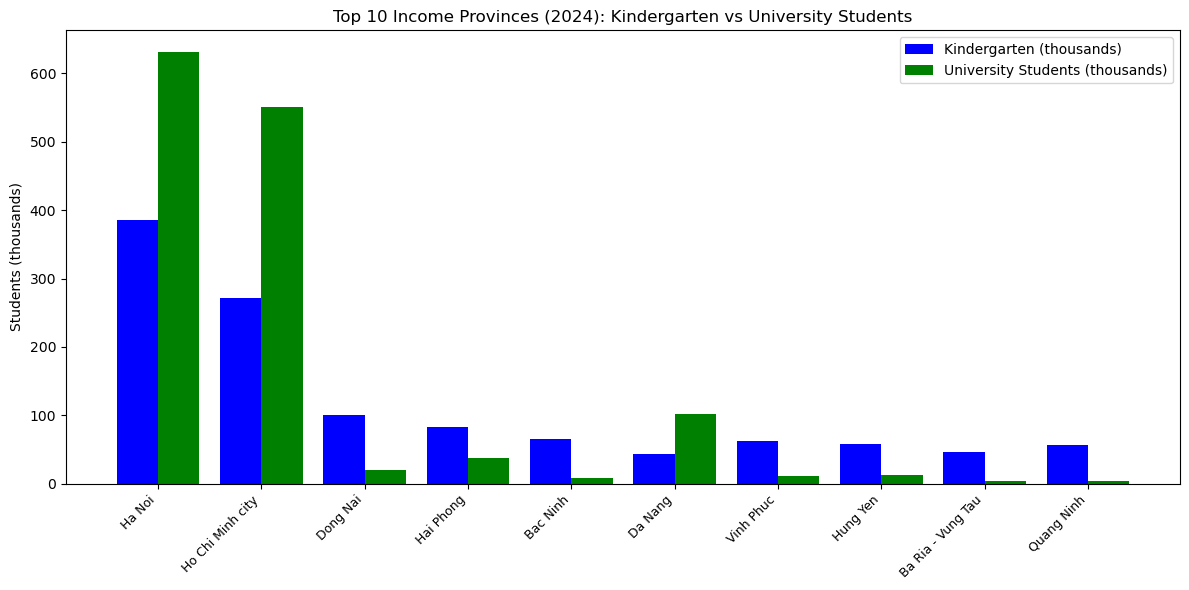

In [ ]:
import numpy as np

# Ensure UniversityStudents is numeric
merged_1["UniversityStudents"] = pd.to_numeric(merged_1["UniversityStudents"], errors="coerce")

# Pick top 10 richest provinces in 2024
top10_income_prov = (
    merged_1[merged_1["Year"] == 2024]
    .nlargest(10, "Income")["Province"]
    .tolist()
)

# Filter dataset to 2024 only
df_top10_income = merged_1[(merged_1["Year"] == 2024) & (merged_1["Province"].isin(top10_income_prov))].copy()

# Convert to the same ratio
df_top10_income["Kindergarten"] = df_top10_income["Kindergarten"] 
df_top10_income["UniversityStudents"] = df_top10_income["UniversityStudents"] / 1000

# Sort by Income descending order
df_top10_income = df_top10_income.sort_values("Income", ascending=False)

# Plot
x = np.arange(len(df_top10_income))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12,6))

# Bars
ax.bar(x - bar_width/2, df_top10_income["Kindergarten"], bar_width, label="Kindergarten (thousands)", color="blue")
ax.bar(x + bar_width/2, df_top10_income["UniversityStudents"], bar_width, label="University Students (thousands)", color="green")

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(df_top10_income["Province"], rotation=45, ha="right", fontsize=9)

# Labels
ax.set_title("Top 10 Income Provinces (2024): Kindergarten vs University Students")
ax.set_ylabel("Students (thousands)")
ax.legend()

plt.tight_layout()
plt.show()


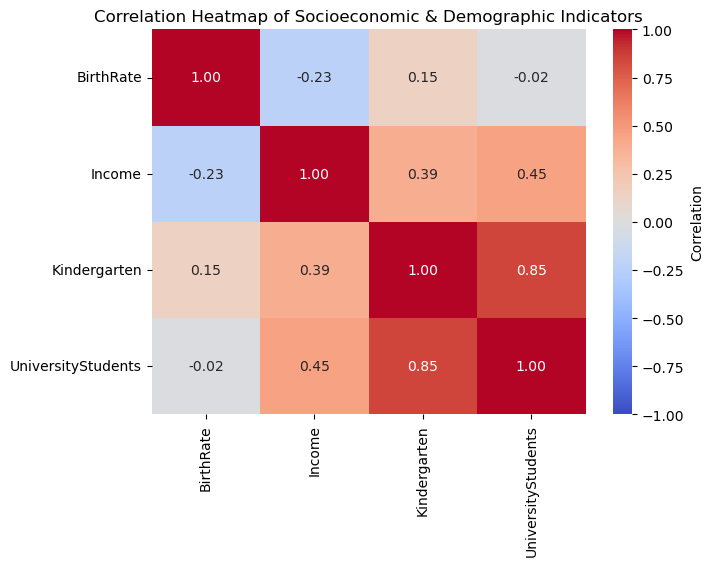

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, cbar_kws={"label": "Correlation"})
plt.title("Correlation Heatmap of Socioeconomic & Demographic Indicators")
plt.show()
